In [4]:
from __future__ import division #, print_function
import sys
import os
import csv
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from fiona.crs import from_epsg
import geopandas as gp
import shapely as shp
from geopandas.tools import sjoin
from shapely.geometry import Point

import pylab as pl
%pylab inline

#import seaborn
#from scipy.optimize import curve_fit, minimize

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime', 'choice']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
#gt_1301 = pd.read_csv('data_raw_green/gt_201601.csv')
#gt_1302 = pd.read_csv('data_raw_green/gt_201602.csv')
#gt_1303 = pd.read_csv('data_raw_green/gt_201603.csv')
#gt_1304 = pd.read_csv('data_raw_green/gt_201604.csv')
#gt_1305 = pd.read_csv('data_raw_green/gt_201605.csv')
#gt_1306 = pd.read_csv('data_raw_green/gt_201606.csv')
#gt_1307 = pd.read_csv('data_raw_green/gt_201607.csv')
gt_1308 = pd.read_csv('data_raw_green/gt_201308.csv')
gt_1309 = pd.read_csv('data_raw_green/gt_201309.csv')
gt_1310 = pd.read_csv('data_raw_green/gt_201310.csv')
gt_1311 = pd.read_csv('data_raw_green/gt_201311.csv')
gt_1312 = pd.read_csv('data_raw_green/gt_201312.csv')

In [6]:
gt_1401 = pd.read_csv('data_raw_green/gt_201401.csv')
gt_1402 = pd.read_csv('data_raw_green/gt_201402.csv')
gt_1403 = pd.read_csv('data_raw_green/gt_201403.csv')
gt_1404 = pd.read_csv('data_raw_green/gt_201404.csv')
gt_1405 = pd.read_csv('data_raw_green/gt_201405.csv')
gt_1406 = pd.read_csv('data_raw_green/gt_201406.csv')
gt_1407 = pd.read_csv('data_raw_green/gt_201407.csv')
gt_1408 = pd.read_csv('data_raw_green/gt_201408.csv')
gt_1409 = pd.read_csv('data_raw_green/gt_201409.csv')
gt_1410 = pd.read_csv('data_raw_green/gt_201410.csv')
gt_1411 = pd.read_csv('data_raw_green/gt_201411.csv')
gt_1412 = pd.read_csv('data_raw_green/gt_201412.csv')

In [7]:
gt_1501 = pd.read_csv('data_raw_green/gt_201501.csv')
gt_1502 = pd.read_csv('data_raw_green/gt_201502.csv')
gt_1503 = pd.read_csv('data_raw_green/gt_201503.csv')
gt_1504 = pd.read_csv('data_raw_green/gt_201504.csv')
gt_1505 = pd.read_csv('data_raw_green/gt_201505.csv')
gt_1506 = pd.read_csv('data_raw_green/gt_201506.csv')
gt_1507 = pd.read_csv('data_raw_green/gt_201507.csv')
gt_1508 = pd.read_csv('data_raw_green/gt_201508.csv')
gt_1509 = pd.read_csv('data_raw_green/gt_201509.csv')
gt_1510 = pd.read_csv('data_raw_green/gt_201510.csv')
gt_1511 = pd.read_csv('data_raw_green/gt_201511.csv')
gt_1512 = pd.read_csv('data_raw_green/gt_201512.csv')

In [8]:
gt_1601 = pd.read_csv('data_raw_green/gt_201601.csv')
gt_1602 = pd.read_csv('data_raw_green/gt_201602.csv')
gt_1603 = pd.read_csv('data_raw_green/gt_201603.csv')
gt_1604 = pd.read_csv('data_raw_green/gt_201604.csv')
gt_1605 = pd.read_csv('data_raw_green/gt_201605.csv')
gt_1606 = pd.read_csv('data_raw_green/gt_201606.csv')
#gt_1607 = pd.read_csv('data_raw_green/gt_201607.csv')
#gt_1608 = pd.read_csv('data_raw_green/gt_201608.csv')
#gt_1609 = pd.read_csv('data_raw_green/gt_201609.csv')
#gt_1610 = pd.read_csv('data_raw_green/gt_201610.csv')
#gt_1611 = pd.read_csv('data_raw_green/gt_201611.csv')
#gt_1612 = pd.read_csv('data_raw_green/gt_201612.csv')

In [164]:
gt_1511.columns

Index([u'Unnamed: 0', u'pu_time', u'do_time', u'pu_lon', u'pu_lat', u'do_lon',
       u'do_lat', u'trip_distance', u'num_trips'],
      dtype='object')

##### enter CB station ID ("choice") and radius ("radius").  Use Notebook 8 to process buffers in bulk.

In [145]:

choice = 3125
radius = 450

In [146]:
station_bounds = pd.read_csv('data_pre_cb/deployment_bounds.csv')
station_bounds.drop(['Unnamed: 0'],axis=1,inplace=True)
station_bounds[station_bounds.station_id == choice]

,boro_name,deployment,station_id,min_lon,min_lat,max_lon,max_lat
659,Queens,8/11/2015 18:16:12,3125,-73.951469,40.745796,-73.948076,40.748376


In [147]:
bufs_3 = gp.GeoDataFrame.from_file('data_pre_cb/bufs_3.shp')
bufs_3.crs = {'init': 'epsg:2263', 'no_defs': True}
bufs_3 = bufs_3.to_crs(epsg=2263)
bufs_3.crs

bufs_c = bufs_3[(bufs_3.station_id == choice) & (bufs_3.radius == radius)]
bufs_c.reset_index(drop=True, inplace = True)
bufs_c

,boro_name,deployment,geometry,radius,station_id
0,Queens,8/11/2015 18:16:12,"POLYGON ((998617.3299189013 211464.1618259908,...",450,3125


In [148]:
station_bounds[station_bounds.station_id == choice]

,boro_name,deployment,station_id,min_lon,min_lat,max_lon,max_lat
659,Queens,8/11/2015 18:16:12,3125,-73.951469,40.745796,-73.948076,40.748376


##### important... enter index number ("idxx") of corresponding station:

In [149]:
idxx = 659

In [150]:
def choose_col_pu(pu_data):
    pu = pu_data[['pu_time','do_time','pu_lon','pu_lat','trip_distance','num_trips']]
    #pu['num_trips'] = pu_data['Trip_distance']
    #pu.rename(columns={'lpep_pickup_datetime':'pu_time','Lpep_dropoff_datetime':'do_time',
    #                        'Pickup_longitude':'pu_lon', 'Pickup_latitude':'pu_lat','Trip_distance':'trip_distance'},
    #          inplace=True)
    return pu


#######################

def trim_bounds_pu(pu_data):
    
    #min_lon = station_bounds[station_bounds['station_id'] == bounds]['min_lon'][0]
    #max_lon = station_bounds[station_bounds['station_id'] == bounds]['max_lon'][0]
    #min_lat = station_bounds[station_bounds['station_id'] == bounds]['min_lat'][0]
    #max_lat = station_bounds[station_bounds['station_id'] == bounds]['max_lat'][0]

    startTime = datetime.datetime.now()

    #b = 430
    
    min_lon = station_bounds.iloc[idxx][3]
    min_lat = station_bounds.iloc[idxx][4] 
    max_lon = station_bounds.iloc[idxx][5]
    max_lat = station_bounds.iloc[idxx][6]    
    
    pu_trim = pu_data[(pu_data['pu_lon'] > min_lon) & (pu_data['pu_lon'] < max_lon) &
                      (pu_data['pu_lat'] > min_lat) & (pu_data['pu_lat'] < max_lat)]
    #print pu_trim
    
    print datetime.datetime.now() - startTime, "Shrunk Dataset", choice 
    
    startTime = datetime.datetime.now()

    geometry = [Point(xy) for xy in zip(pu_trim['pu_lon'], pu_trim['pu_lat'])]
    crs = {'init': 'epsg:4326', 'no_defs': True}
#    crs = {'init': 'epsg:2263', 'no_defs': True}
    pu_data_points = gp.GeoDataFrame(pu_trim, crs=crs, geometry=geometry)       
    pu_data_points = pu_data_points.to_crs(epsg=2263)
    
    print datetime.datetime.now() - startTime, "Created Points"

    return pu_data_points

#############################

def join_pu(rides_pu):
    
    startTime = datetime.datetime.now()

    mg = sjoin(rides_pu, bufs_c, how='inner', op='within')
    
    print datetime.datetime.now() - startTime,"Spatial join done"

    return mg
    

    
def trim_by_date_pu(pu_dt):

    startTime = datetime.datetime.now()
        
    pu_dt['start'] = pd.to_datetime(pu_dt['pu_time'])
    pu_dt['end'] = pd.to_datetime(pu_dt['do_time'])
    pu_dt['trip_time'] = (pu_dt['end'] - pu_dt['start']).dt.total_seconds()/60
    pu_dt.reset_index(drop=True, inplace = True)

    print datetime.datetime.now() - startTime,"Made trip time"
    
    return pu_dt

    
    
def agg_pu(pu_ag):
    
    startTime = datetime.datetime.now()

    pu_ag['pu_date'] = pu_ag['start'].dt.date
    data_pu_ag = pu_ag[['pu_date','station_id','radius','num_trips','trip_distance','trip_time']].sort(['station_id','radius','pu_date'])
    data_pu_ag.reset_index(inplace = True)

    data_pu_ag = data_pu_ag.groupby(['station_id','radius','pu_date']).agg({'num_trips': "count", 'trip_distance':"mean",'trip_time':"mean"})
    
    print datetime.datetime.now() - startTime,"Aggregated by date"
    
    data_pu_ag.reset_index(inplace = True)

    return data_pu_ag

def run_all(taxi_data):
    txd = choose_col_pu(taxi_data)
    txd = trim_bounds_pu(txd)
    txd = join_pu(txd)
    txd = trim_by_date_pu(txd)
    txd = agg_pu(txd)
    
    return txd

In [134]:
gtx_pu = pd.DataFrame()

In [151]:
#gtx_1301_pu = run_all(gt_1301)
#gtx_1302_pu = run_all(gt_1302)
#gtx_1303_pu = run_all(gt_1303)
#gtx_1304_pu = run_all(gt_1304)
#gtx_1305_pu = run_all(gt_1305)
#gtx_1306_pu = run_all(gt_1306)
#gtx_1307_pu = run_all(gt_1307)

#gtx_1308_pu = run_all(gt_1308)
#gtx_1309_pu = run_all(gt_1309)
#gtx_1310_pu = run_all(gt_1310)
gtx_1311_pu = run_all(gt_1311)
gtx_1312_pu = run_all(gt_1312)


gtx_1401_pu = run_all(gt_1401)
gtx_1402_pu = run_all(gt_1402)
gtx_1403_pu = run_all(gt_1403)
gtx_1404_pu = run_all(gt_1404)
gtx_1405_pu = run_all(gt_1405)
gtx_1406_pu = run_all(gt_1406)
gtx_1407_pu = run_all(gt_1407)
gtx_1408_pu = run_all(gt_1408)
gtx_1409_pu = run_all(gt_1409)
gtx_1410_pu = run_all(gt_1410)
gtx_1411_pu = run_all(gt_1411)
gtx_1412_pu = run_all(gt_1412)

gtx_1501_pu = run_all(gt_1501)
gtx_1502_pu = run_all(gt_1502)
gtx_1503_pu = run_all(gt_1503)
gtx_1504_pu = run_all(gt_1504)
gtx_1505_pu = run_all(gt_1505)
gtx_1506_pu = run_all(gt_1506)
gtx_1507_pu = run_all(gt_1507)
gtx_1508_pu = run_all(gt_1508)
gtx_1509_pu = run_all(gt_1509)
gtx_1510_pu = run_all(gt_1510)
gtx_1511_pu = run_all(gt_1511)
gtx_1512_pu = run_all(gt_1512)


gtx_1601_pu = run_all(gt_1601)
gtx_1602_pu = run_all(gt_1602)
gtx_1603_pu = run_all(gt_1603)
gtx_1604_pu = run_all(gt_1604)
gtx_1605_pu = run_all(gt_1605)
gtx_1606_pu = run_all(gt_1606)

#gtx_pu = gtx_pu.append(gtx_1308_pu, ignore_index=True)
#gtx_pu = gtx_pu.append(gtx_1309_pu, ignore_index=True)
#gtx_pu = gtx_pu.append(gtx_1310_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1311_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1312_pu, ignore_index=True)

gtx_pu = gtx_pu.append(gtx_1401_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1402_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1403_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1404_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1405_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1406_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1407_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1408_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1409_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1410_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1411_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1412_pu, ignore_index=True)

gtx_pu = gtx_pu.append(gtx_1501_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1502_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1503_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1504_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1505_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1506_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1507_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1508_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1509_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1510_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1511_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1512_pu, ignore_index=True)

gtx_pu = gtx_pu.append(gtx_1601_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1602_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1603_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1604_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1605_pu, ignore_index=True)
gtx_pu = gtx_pu.append(gtx_1606_pu, ignore_index=True)


0:00:00.008592 Shrunk Dataset 3125
0:00:00.006745 Created Points
0:00:00.019506 Spatial join done
0:00:00.003907 Made trip time
0:00:00.009502 Aggregated by date
0:00:00.010635 Shrunk Dataset 3125
0:00:00.009974 Created Points
0:00:00.022921 Spatial join done
0:00:00.003935 Made trip time
0:00:00.009413 Aggregated by date


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:80: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


0:00:00.013659 Shrunk Dataset 3125
0:00:00.016872 Created Points
0:00:00.028927 Spatial join done
0:00:00.004013 Made trip time
0:00:00.008991 Aggregated by date
0:00:00.016797 Shrunk Dataset 3125
0:00:00.013696 Created Points
0:00:00.028180 Spatial join done
0:00:00.004053 Made trip time
0:00:00.009553 Aggregated by date
0:00:00.023763 Shrunk Dataset 3125
0:00:00.022938 Created Points
0:00:00.037895 Spatial join done
0:00:00.004159 Made trip time
0:00:00.009424 Aggregated by date
0:00:00.022221 Shrunk Dataset 3125
0:00:00.022610 Created Points
0:00:00.038639 Spatial join done
0:00:00.003998 Made trip time
0:00:00.009277 Aggregated by date
0:00:00.024305 Shrunk Dataset 3125
0:00:00.025663 Created Points
0:00:00.038668 Spatial join done
0:00:00.003853 Made trip time
0:00:00.008880 Aggregated by date
0:00:00.023004 Shrunk Dataset 3125
0:00:00.028382 Created Points
0:00:00.043801 Spatial join done
0:00:00.004074 Made trip time
0:00:00.009466 Aggregated by date
0:00:00.023606 Shrunk Datase

In [152]:
gtx_pu

,station_id,radius,pu_date,num_trips,trip_distance,trip_time
0,3125,150,2013-11-22,5,0.200000,0.973333
1,3125,150,2013-12-04,1,2.470000,10.233333
2,3125,150,2013-12-07,2,2.980000,9.366667
3,3125,150,2013-12-11,1,4.000000,16.033333
4,3125,150,2013-12-14,1,2.600000,15.033333
5,3125,150,2013-12-20,1,3.750000,33.733333
6,3125,150,2013-12-24,1,0.000000,0.166667
7,3125,150,2013-12-27,1,17.600000,63.533333
8,3125,150,2013-12-28,1,15.490000,22.416667
9,3125,150,2014-01-10,1,2.740000,13.333333


In [153]:
green_3125_pu = gtx_pu
green_3125_pu.to_csv('data_pre_green/green_3125_pu.csv')

In [119]:
# prepare boro shapefiles for plotting

boro_shapes_feet= gp.GeoDataFrame.from_file("data/boro_shapes.shp")
boro_shapes_feet.crs = {'init': 'epsg:2263', 'no_defs': True}
boro_shapes_feet = boro_shapes_feet.to_crs(epsg=2263)
boro_shapes_feet.crs

{'init': 'epsg:2263', 'no_defs': True}

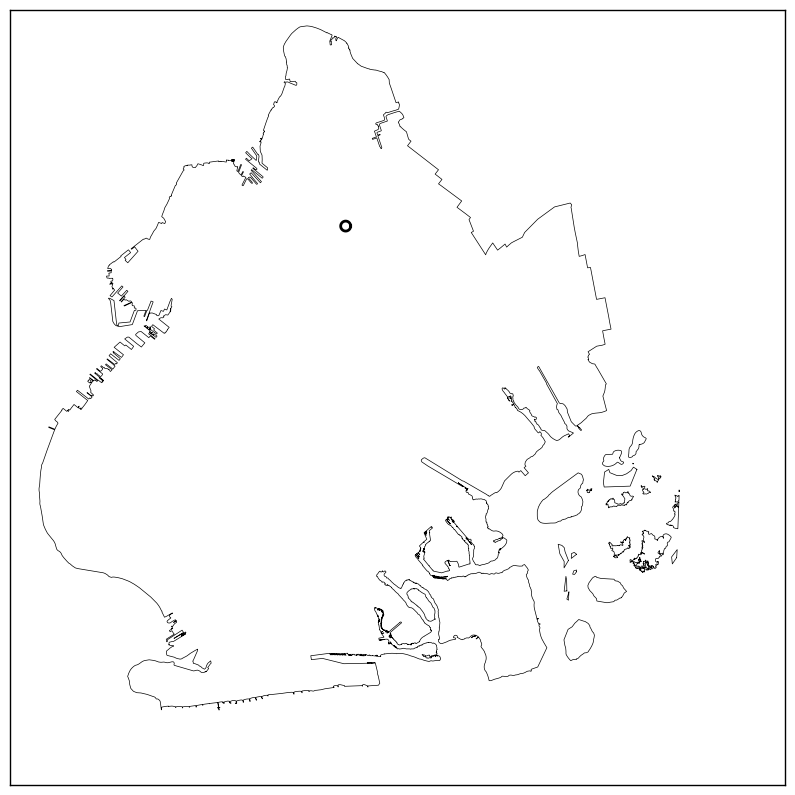

In [243]:
bn1 = 'Brooklyn'
bn2 = 'Manhattan'
bn3 = 'Queens'

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#boro_shapes_feet.plot(column='boro_name',alpha=.05,color='grey',linewidth=0.5,ax=ax)
boro_shapes_feet[boro_shapes_feet.boro_name == bn1].plot(column='boro_name',alpha=.1,color='white',linewidth=0.5,ax=ax)
bufs_3054_450.plot(alpha=.1,color='white', linewidth=2,ax=ax)
#yl_1601_pu.plot(alpha=2,color='red', linewidth=.1,ax=ax)
#gt_1601_pu.plot(alpha=2,color='red', linewidth=.1,ax=ax)
#gt_1602_pu.plot(alpha=2,color='red', linewidth=.1,ax=ax) 
#gt_1603_pu.plot(alpha=2,color='red', linewidth=.1,ax=ax) 
#gt_1604_pu.plot(alpha=2,color='red', linewidth=.1,ax=ax) 
#gt_1605_pu.plot(alpha=2,color='red', linewidth=.1,ax=ax) 
#gt_1606_pu.plot(alpha=2,color='red', linewidth=.1,ax=ax)


#boro_shapes_feet[boro_shapes_feet.boro_name == bn2].plot(column='boro_name',alpha=.1,color='grey',linewidth=0.5,ax=ax)
#boro_shapes_feet[boro_shapes_feet.boro_name == bn3].plot(column='boro_name',alpha=.1,color='grey',linewidth=0.5,ax=ax)

#bufs_3[bufs_3.boro_name == bn1].



In [17]:
bufs_3[(bufs_3.station_id == choice) & (bufs_3.radius == radius)]

,boro_name,deployment,geometry,radius,station_id
439,Brooklyn,8/26/2015 13:52:20,"POLYGON ((1002212.015925959 189324.9275563995,...",150,3052
